In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Cargar el dataset con la codificación adecuada
df = pd.read_csv('/content/drive/MyDrive/preprocesamiento/sentiment140.csv', encoding='ISO-8859-1', header=None)

# Renombrar las columnas para mayor claridad
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Reemplazar las etiquetas de polaridad (0 -> negativo, 4 -> positivo)
df['polarity'] = df['polarity'].replace({0: 'negative', 4: 'positive'})

In [7]:
df = df.drop_duplicates(subset='text')
df

,polarity,id,date,query,user,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Dividir el dataset en tweets positivos y negativos
positive_tweets = df[df['polarity'] == 'positive']
negative_tweets = df[df['polarity'] == 'negative']

# Tomar una submuestra de 50,000 de cada clase para equilibrio
positive_sample = positive_tweets.sample(n=75000, random_state=34)
negative_sample = negative_tweets.sample(n=75000, random_state=34)
1
# Combinar ambos subconjuntos
balanced_sample = pd.concat([positive_sample, negative_sample])

# Mezclar el conjunto de datos
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribución de sentimientos
print(balanced_sample['polarity'].value_counts())

polarity
positive    75000
negative    75000
Name: count, dtype: int64


In [10]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la polaridad de cada tweet
def get_vader_polarity(tweet):
    return analyzer.polarity_scores(tweet)['compound']

# Aplicar la función para obtener la polaridad
balanced_sample['vader_polarity'] = balanced_sample['text'].apply(get_vader_polarity)

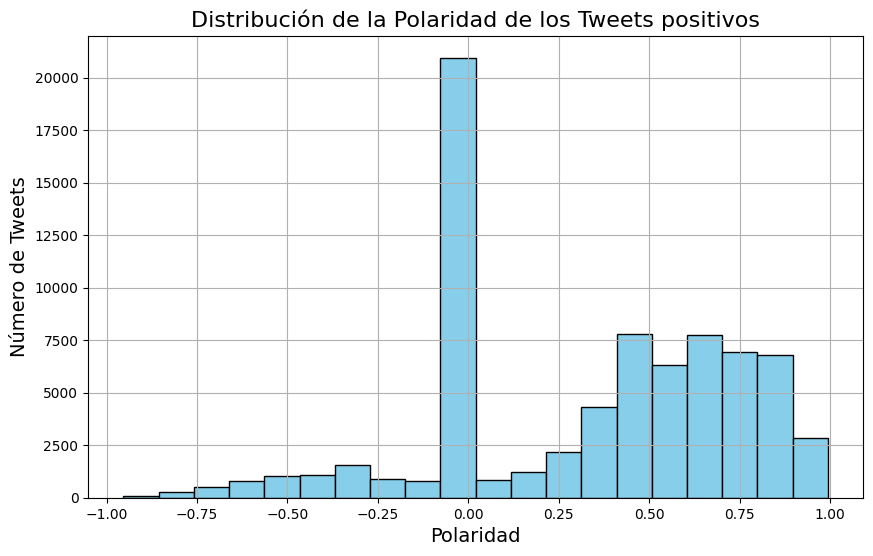

In [12]:
positive_tweets = balanced_sample[balanced_sample['polarity'] == 'positive']
negative_tweets = balanced_sample[balanced_sample['polarity'] == 'negative']

import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes un DataFrame con los valores de polaridad
# df es el DataFrame y 'polarity' la columna con los valores obtenidos de VADER
# df = pd.DataFrame({'polarity': [0.1, -0.5, 0.2, 0.7, -0.1, 0.0, 0.4]})

# Crear un histograma de la distribución de las polaridades
plt.figure(figsize=(10, 6))
plt.hist(positive_tweets['vader_polarity'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Polaridad de los Tweets positivos', fontsize=16)
plt.xlabel('Polaridad', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()



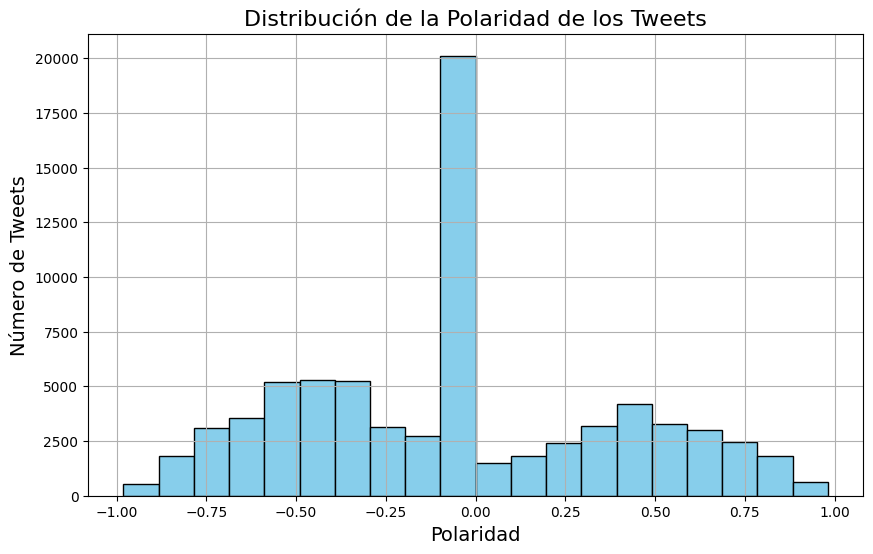

In [13]:
# Supongamos que ya tienes un DataFrame con los valores de polaridad
# df es el DataFrame y 'polarity' la columna con los valores obtenidos de VADER
# df = pd.DataFrame({'polarity': [0.1, -0.5, 0.2, 0.7, -0.1, 0.0, 0.4]})

# Crear un histograma de la distribución de las polaridades
plt.figure(figsize=(10, 6))
plt.hist(negative_tweets['vader_polarity'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Polaridad de los Tweets', fontsize=16)
plt.xlabel('Polaridad', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()

In [14]:
# Filtrar tweets negativos con polaridad < 0.5
tweets_negativos = balanced_sample[(balanced_sample['polarity'] == 'negative') & (balanced_sample['vader_polarity'] < 0.4)]

# Filtrar tweets positivos con polaridad > -0.5
tweets_positivos = balanced_sample[(balanced_sample['polarity'] == 'positive') & (balanced_sample['vader_polarity'] > -0.4)]


In [15]:
# Juntar los tweets negativos y positivos
tweets_juntos = pd.concat([tweets_negativos, tweets_positivos], ignore_index=True)

# Mezclar los tweets
tweets_mezclados = tweets_juntos.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar el resultado
print(tweets_mezclados)

        polarity          id                          date     query  \
0       negative  2184288131  Mon Jun 15 15:41:28 PDT 2009  NO_QUERY   
1       negative  1834602716  Mon May 18 03:33:33 PDT 2009  NO_QUERY   
2       positive  1976167179  Sat May 30 16:44:04 PDT 2009  NO_QUERY   
3       positive  2047727017  Fri Jun 05 14:05:11 PDT 2009  NO_QUERY   
4       positive  2014391411  Wed Jun 03 01:22:32 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
131223  negative  2175983387  Mon Jun 15 02:34:22 PDT 2009  NO_QUERY   
131224  positive  2185123417  Mon Jun 15 16:55:17 PDT 2009  NO_QUERY   
131225  positive  1834315088  Mon May 18 02:27:47 PDT 2009  NO_QUERY   
131226  positive  1676509898  Fri May 01 22:15:41 PDT 2009  NO_QUERY   
131227  positive  2057368497  Sat Jun 06 12:52:29 PDT 2009  NO_QUERY   

                   user                                               text  \
0                 Zelus  I want my e-mail with my trackin

In [17]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=a9511cf3019cff965cb291d2949b8da4ae98a6ec79ca4c1f67a6e258f92b97a9
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [18]:
import re
import string
import nltk
from autocorrect import Speller
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Inicialización de herramientas
spell = Speller(fast=True)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
wnl = WordNetLemmatizer()
stoplist = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Función para obtener las etiquetas POS correctas para la lematización
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Por defecto, como sustantivo

# Función para eliminar URLs, hashtags, menciones, emojis y otros patrones
def quita_URL_y_patrones(frase):
    frase = re.sub(r'http\S+', '', frase)  # Eliminar URLs
    frase = re.sub(r'pic.twitter.com/\S+', '', frase)  # Eliminar imágenes adjuntas
    frase = re.sub(r'#\S+', '', frase)  # Eliminar hashtags
    frase = re.sub(r'@\w+', '', frase)  # Eliminar menciones de usuarios
    frase = re.sub(r'[^\w\s@]', '', frase)  # Eliminar símbolos no alfanuméricos excepto @
    frase = re.sub(r'\s+', ' ', frase).strip()  # Eliminar espacios adicionales
    return frase

# Función de preprocesamiento de una frase con lematización
def preprocesado(frase):
    frase = quita_URL_y_patrones(frase)  # Limpieza de URLs, hashtags, etc.
    frase = spell(frase)  # Corrección ortográfica
    tweet_tokens = tknzr.tokenize(frase)  # Tokenización
    tagged_tokens = nltk.pos_tag(tweet_tokens)  # Etiquetado POS (Part of Speech)

    # Lematización con las etiquetas POS adecuadas
    lemmas = [wnl.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged_tokens]

    # Filtrar puntuación y eliminar stopwords
    clean_words = [word.lower() for word in lemmas if word.lower() not in stoplist and word not in punctuation]

    return ' '.join(clean_words)  # Devolver la frase procesada como un string

# Función principal para preprocesar un dataset de tweets
def preprocesa(dataset_values):
    resultados = []

    for frase in dataset_values:
        proc = preprocesado(frase)
        resultados.append(proc)

    return resultados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
tweets_mezclados['preprocesado']=preprocesa(tweets_mezclados['text'])

In [ ]:
import fasttext
ft = fasttext.load_model('fasttext_twitter_raw.bin')

In [20]:
import re
import string
import nltk
from autocorrect import Speller
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Inicialización de herramientas
spell = Speller(fast=True)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
wnl = WordNetLemmatizer()
stoplist = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Función para obtener las etiquetas POS correctas para la lematización
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Por defecto, como sustantivo

# Función para eliminar URLs, hashtags, menciones, emojis y otros patrones
def quita_URL_y_patrones(frase):
    frase = re.sub(r'http\S+', '', frase)  # Eliminar URLs
    frase = re.sub(r'pic.twitter.com/\S+', '', frase)  # Eliminar imágenes adjuntas
    frase = re.sub(r'#\S+', '', frase)  # Eliminar hashtags
    frase = re.sub(r'@\w+', '', frase)  # Eliminar menciones de usuarios
    frase = re.sub(r'[^\w\s@]', '', frase)  # Eliminar símbolos no alfanuméricos excepto @
    frase = re.sub(r'\s+', ' ', frase).strip()  # Eliminar espacios adicionales
    return frase

# Función de preprocesamiento de una frase con lematización
def preprocesado(frase):
    frase = quita_URL_y_patrones(frase)  # Limpieza de URLs, hashtags, etc.
    frase = spell(frase)  # Corrección ortográfica
    tweet_tokens = tknzr.tokenize(frase)  # Tokenización
    tagged_tokens = nltk.pos_tag(tweet_tokens)  # Etiquetado POS (Part of Speech)

    # Lematización con las etiquetas POS adecuadas
    lemmas = [wnl.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged_tokens]

    # Filtrar puntuación y eliminar stopwords
    clean_words = [word.lower() for word in lemmas if word.lower() not in punctuation]

    return ' '.join(clean_words)  # Devolver la frase procesada como un string

# Función principal para preprocesar un dataset de tweets
def preprocesa(dataset_values):
    resultados = []

    for frase in dataset_values:
        proc = preprocesado(frase)
        resultados.append(proc)

    return resultados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
tweets_mezclados['preprocesado_constopwords']=preprocesa(tweets_mezclados['text'])

In [22]:
tweets_mezclados

,polarity,id,date,query,user,text,vader_polarity,preprocesado,preprocesado_constopwords
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,i want my email with my track info for my new ...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,and forgotyou get kiddy home still free agent ...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,no problem josh her work be amaze
...,...,...,...,...,...,...,...,...,...
131223,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,back from school two more week of school here ...
131224,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,ill be sure to let daddy know hell be really h...
131225,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,yyy new country invasion xd don wi helmet
131226,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,just come back from op shopping in wynnum ther...


In [23]:
tweets_mezclados['word_count'] = tweets_mezclados['preprocesado_constopwords'].apply(lambda x: len(x.split()))

In [24]:
tweets_mezclados['word_count'].value_counts().sort_index()

,count
word_count,
0,322
1,1301
2,3462
3,5039
4,6983
5,7519
6,7943
7,7904
8,7604


In [25]:
df_def=tweets_mezclados[tweets_mezclados['word_count']>3]

In [26]:
import re
import string
import nltk
from autocorrect import Speller
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Inicialización de herramientas
spell = Speller(fast=True)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
stoplist = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Función para eliminar URLs, hashtags, menciones, emojis y otros patrones
def quita_URL_y_patrones(frase):
    frase = re.sub(r'http\S+', '', frase)  # Eliminar URLs
    frase = re.sub(r'pic.twitter.com/\S+', '', frase)  # Eliminar imágenes adjuntas
    frase = re.sub(r'#\S+', '', frase)  # Eliminar hashtags
    frase = re.sub(r'@\w+', '', frase)  # Eliminar menciones de usuarios
    frase = re.sub(r'[^\w\s@]', '', frase)  # Eliminar símbolos no alfanuméricos excepto @
    frase = re.sub(r'\s+', ' ', frase).strip()  # Eliminar espacios adicionales
    return frase

# Función de preprocesamiento de una frase sin lematización
def preprocesado(frase):
    frase = quita_URL_y_patrones(frase)  # Limpieza de URLs, hashtags, etc.
    frase = spell(frase)  # Corrección ortográfica
    tweet_tokens = tknzr.tokenize(frase)  # Tokenización

    # Filtrar puntuación y eliminar stopwords
    clean_words = [word.lower() for word in tweet_tokens if word.lower() not in punctuation]

    return ' '.join(clean_words)  # Devolver la frase procesada como un string

# Función principal para preprocesar un dataset de tweets
def preprocesa(dataset_values):
    resultados = []

    for frase in dataset_values:
        proc = preprocesado(frase)
        resultados.append(proc)

    return resultados


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:

df_def['preprocesado_sinlematizar']=preprocesa(df_def['text'])




<ipython-input-27-bcca389dfc44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['preprocesado_sinlematizar']=preprocesa(df_def['text'])


In [28]:
df_def

,polarity,id,date,query,user,text,vader_polarity,preprocesado,preprocesado_constopwords,word_count,preprocesado_sinlematizar
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,i want my email with my track info for my new ...,12,i want my email with my tracking info for my n...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,is not happy with the weather im off to the mu...,27,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,and forgotyou get kiddy home still free agent ...,16,and forgotyou got kiddies home still free agen...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,will always be number two in m book,8,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,no problem josh her work be amaze,7,no problem josh her work is amazing
...,...,...,...,...,...,...,...,...,...,...,...
131223,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,back from school two more week of school here ...,13,back from school two more weeks of school here...
131224,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,ill be sure to let daddy know hell be really h...,11,ill be sure to let daddy know hell be really h...
131225,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,yyy new country invasion xd don wi helmet,8,yyy new country invasion xd dons wi helmet
131226,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,just come back from op shopping in wynnum ther...,24,just came back from op shopping in wynnum ther...


In [ ]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

label_mapping = {
    'negative': 0,
    'positive': 1,
    'neutral': 2
}



# Mapear las etiquetas a valores numéricos
df_def['label'] = df_def['polarity'].map(label_mapping)
# Etiquetas
y = df_def['label']  # Asegúrate de que 'label' contenga las etiquetas numéricas

# Dividir el conjunto de datos en entrenamiento y prueba
X = df_def['preprocesado_sinlematizar']
y = df_def['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Configuración de Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X = pad_sequences(sequences)

import numpy as np
# Crear una matriz de embeddings
embedding_dim = 400
word_index = tokenizer.word_index
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    try:
        embedding_vector = ft.get_word_vector(word)
        embedding_matrix[i] = embedding_vector
    except KeyError:
        continue

/tmp/ipykernel_1671/2394413513.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['label'] = df_def['polarity'].map(label_mapping)


In [ ]:
import numpy as np
# Guardar la matriz en un archivo binario
np.save('embeddings_matrix_vader_sinlematizar.npy', embedding_matrix)

# Supongamos que tienes un DataFrame llamado 'df'
df_def.to_csv('sentiment140_vader4_sinlematizar.csv', index=False)

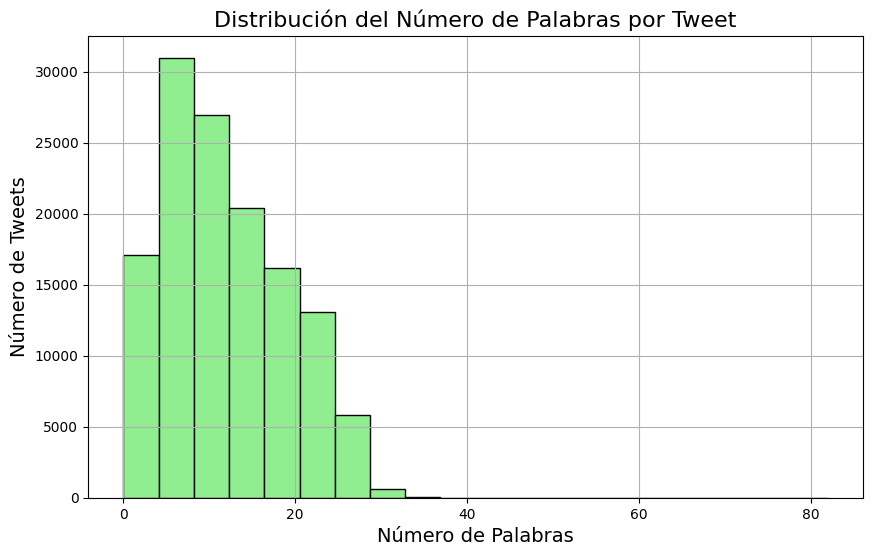

In [30]:
# Crear un histograma del número de palabras por tweet
plt.figure(figsize=(10, 6))
plt.hist(tweets_mezclados['word_count'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Número de Palabras por Tweet', fontsize=16)
plt.xlabel('Número de Palabras', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()


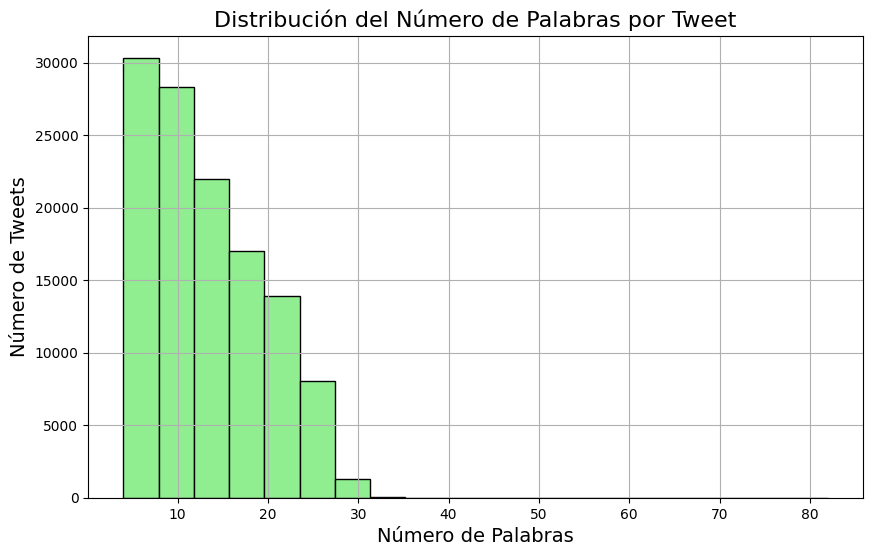

In [31]:
# Crear un histograma del número de palabras por tweet
plt.figure(figsize=(10, 6))
plt.hist(df_def['word_count'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Número de Palabras por Tweet', fontsize=16)
plt.xlabel('Número de Palabras', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()